
# COVID-19 Экспоненциальный рост

КБ-211 Ставер Леонид

Задание: Возьмите открытые данные о росте числа зараженных COVID-19 в мире или стране за три месяца. Первый месяц из трех определяется сдвигом на номер по списку с февраля 2020 года. Проверьте гипотезу о том, что этот рост описывается экспоненциальной функцией. Полученное р-значение сравните с уровнем значимости 0,05.


### Получение данных

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings

warnings.filterwarnings("ignore")

# --- Параметры ---
student_number = 17
alpha = 0.05
base = pd.Timestamp("2020-02-01")

start_month = base + pd.DateOffset(months=student_number)
end_month = start_month + pd.DateOffset(months=3) - pd.DateOffset(seconds=1)

print(f"""
Номер по списку: {student_number}
Сдвиг от февраля 2020: {student_number} месяцев
Период анализа: {start_month.date()} - {end_month.date()}
Уровень значимости: {alpha}
""")


Номер по списку: 17
Сдвиг от февраля 2020: 17 месяцев
Период анализа: 2021-07-01 - 2021-09-30
Уровень значимости: 0.05



### Загрузка и предподготовка

In [4]:
# --- Загрузка и подготовка данных ---
data = pd.read_csv('./source/_Все_случаи_по_стране_за_день_в_динамике_2022_02_15_13_57.csv')
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.sort_values('DateTime', inplace=True)

covid_data = data[(data['DateTime'] >= start_month) & (data['DateTime'] <= end_month)].copy()
covid_data['Накопленные_случаи'] = covid_data['Заражений за день'].cumsum()
covid_data['День'] = (covid_data['DateTime'] - covid_data['DateTime'].min()).dt.days

print(f"""
Данные за период:
  Кол-во дней: {len(covid_data)}
  Диапазон: {covid_data['DateTime'].min().date()} - {covid_data['DateTime'].max().date()}
  Всего заражений: {covid_data['Заражений за день'].sum()}
""")
print(covid_data[['DateTime', 'Заражений за день', 'Накопленные_случаи', 'День']].head())
print(covid_data[['DateTime', 'Заражений за день', 'Накопленные_случаи', 'День']].tail())


Данные за период:
  Кол-во дней: 92
  Диапазон: 2021-07-01 - 2021-09-30
  Всего заражений: 1996427

      DateTime  Заражений за день  Накопленные_случаи  День
476 2021-07-01              23543               23543     0
477 2021-07-02              23218               46761     1
478 2021-07-03              24439               71200     2
479 2021-07-04              25142               96342     3
480 2021-07-05              24353              120695     4
      DateTime  Заражений за день  Накопленные_случаи  День
563 2021-09-26              22498             1906314    87
564 2021-09-27              22236             1928550    88
565 2021-09-28              21559             1950109    89
566 2021-09-29              22430             1972539    90
567 2021-09-30              23888             1996427    91


### Визуализация данных


Статистики:
  Дисперсия: 5490875.18
  Среднее квадр. отклонение: 2343.26
  Среднее значение: 21700.29
  Корреляция (День ~ Случаи): R = -0.7614, p = 0.0000



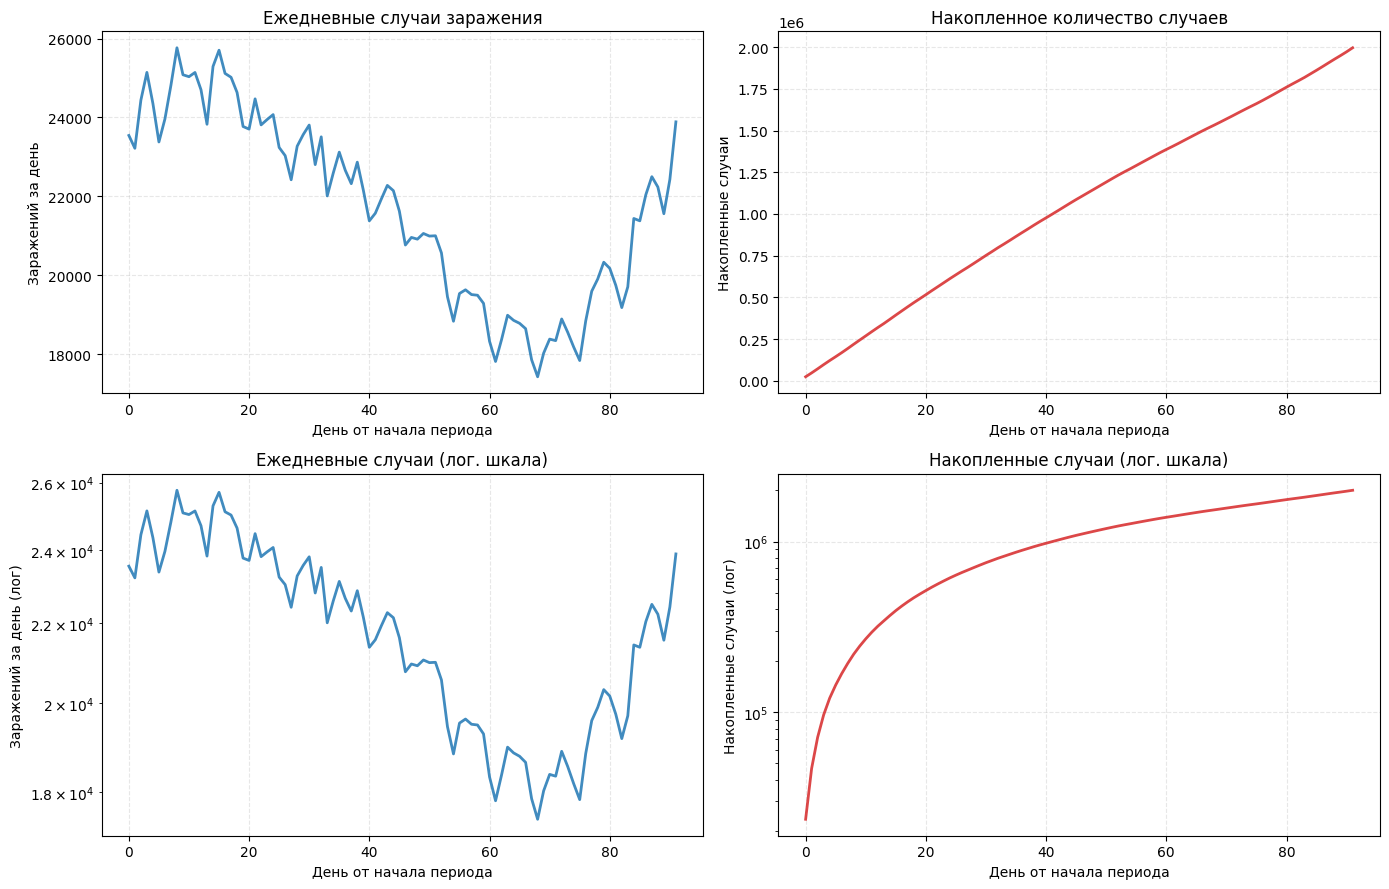


Линейная регрессия (лог y):
  ln(y) = -0.003077 * x + 10.119236
  R = -0.750622, R² = 0.563433, p = 0.000000



In [5]:
z = covid_data['Заражений за день']
variance, std_dev, mean = z.var(), z.std(), z.mean()
corr, p = stats.pearsonr(covid_data['День'], z)

print(f"""
Статистики:
  Дисперсия: {variance:.2f}
  Среднее квадр. отклонение: {std_dev:.2f}
  Среднее значение: {mean:.2f}
  Корреляция (День ~ Случаи): R = {corr:.4f}, p = {p:.4f}
""")

# --- Визуализация ---
fig, axes = plt.subplots(2, 2, figsize=(14, 9))
axes = axes.ravel()

plots = [
    ('День', 'Заражений за день', 'Ежедневные случаи заражения', '#1f77b4', 'Заражений за день'),       # Синий
    ('День', 'Накопленные_случаи', 'Накопленное количество случаев', '#d62728', 'Накопленные случаи'), # Оранжевый
    ('День', 'Заражений за день', 'Ежедневные случаи (лог. шкала)', '#1f77b4', 'Заражений за день (лог)', True),  # Зелёный
    ('День', 'Накопленные_случаи', 'Накопленные случаи (лог. шкала)', '#d62728', 'Накопленные случаи (лог)', True) # Красный
]

for ax, (x, y, title, color, ylabel, *log) in zip(axes, plots):
    df = covid_data[covid_data[y] > 0] if log else covid_data
    (ax.semilogy if log else ax.plot)(df[x], df[y], color=color, linewidth=2, alpha=0.85)
    ax.set(title=title, xlabel='День от начала периода', ylabel=ylabel)
    ax.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# --- Логарифмическая регрессия ---
valid = covid_data[covid_data['Заражений за день'] > 0]
x, y = valid['День'], np.log(valid['Заражений за день'])
a, b = np.polyfit(x, y, 1)
corr, p = stats.pearsonr(x, y)

print(f"""
Линейная регрессия (лог y):
  ln(y) = {a:.6f} * x + {b:.6f}
  R = {corr:.6f}, R² = {corr**2:.6f}, p = {p:.6f}
""")


### Критерий согласия хи-квадрат


------------------------------------------------------------
                  КРИТЕРИЙ ХИ-КВАДРАТ (χ²)                  
------------------------------------------------------------

n=92, mean(ε)=-0.000000, σ=0.072335

Интервалы: 8, сумма наблюд.: 92, теоретич.: 90.31

После объединения: 6 интервалов

РЕЗУЛЬТАТЫ χ²-ТЕСТА:
  χ² = 14.8323, df = 4, χ²_кр = 9.4877
  p-value = 0.005062, α = 0.05
  H₀ (ε ~ N(0, σ)) ОТВЕРГАЕТСЯ



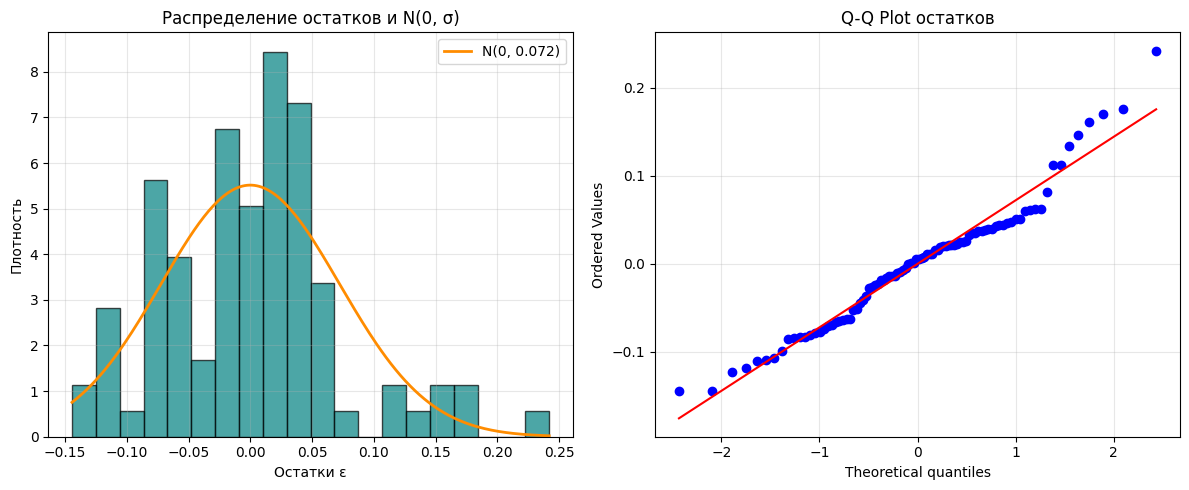

In [8]:
def banner(msg: str):
    print(f"\n{'-'*60}\n{msg.center(60)}\n{'-'*60}\n")

banner(msg = "КРИТЕРИЙ ХИ-КВАДРАТ (χ²)")

# --- Определение переменных для логарифмического анализа ---
valid = covid_data[covid_data['Заражений за день'] > 0]
log_x = valid['День']
log_y = np.log(valid['Заражений за день'])

# --- Остатки и параметры ---
modal_values = a * log_x + b
residuals = log_y - modal_values
n = len(residuals)
sigma_est = residuals.std(ddof=1)

print(f"n={n}, mean(ε)={residuals.mean():.6f}, σ={sigma_est:.6f}")

# --- Интервалы и частоты ---
num_intervals = min(8, n // 10)
bounds = np.linspace(residuals.min() * 1.05, residuals.max() * 1.05, num_intervals + 1)
obs_freq, _ = np.histogram(residuals, bins=bounds)

cdf = stats.norm.cdf(bounds / sigma_est)
theo_freq = n * np.diff(cdf)
print(f"\nИнтервалы: {num_intervals}, сумма наблюд.: {obs_freq.sum()}, теоретич.: {theo_freq.sum():.2f}")

# --- Объединение малых интервалов (<5) ---
min_freq, it = 5, 0
while len(obs_freq) > 2 and (obs_freq.min() < min_freq or theo_freq.min() < min_freq) and it < 10:
    i = np.argmin(theo_freq)
    if i == 0:
        obs_freq[1] += obs_freq[0]; theo_freq[1] += theo_freq[0]
        obs_freq, theo_freq, bounds = obs_freq[1:], theo_freq[1:], bounds[1:]
    elif i == len(theo_freq) - 1:
        obs_freq[-2] += obs_freq[-1]; theo_freq[-2] += theo_freq[-1]
        obs_freq, theo_freq, bounds = obs_freq[:-1], theo_freq[:-1], bounds[:-1]
    else:
        j = i - 1 if theo_freq[i - 1] <= theo_freq[i + 1] else i + 1
        obs_freq[min(i, j)] += obs_freq[max(i, j)]
        theo_freq[min(i, j)] += theo_freq[max(i, j)]
        obs_freq, theo_freq = np.delete(obs_freq, max(i, j)), np.delete(theo_freq, max(i, j))
        bounds = np.delete(bounds, max(i, j) + 1)
    it += 1

# --- Нормализация ---
if abs(obs_freq.sum() - theo_freq.sum()) > 1e-6:
    theo_freq *= obs_freq.sum() / theo_freq.sum()

print(f"\nПосле объединения: {len(obs_freq)} интервалов")

# --- χ²-тест ---
if len(obs_freq) >= 2:
    chi2, p = stats.chisquare(obs_freq, theo_freq, ddof=1)
    df = max(1, len(obs_freq) - 2)
    chi2_crit = stats.chi2.ppf(1 - alpha, df)
    accept = chi2 <= chi2_crit
    print(f"""
РЕЗУЛЬТАТЫ χ²-ТЕСТА:
  χ² = {chi2:.4f}, df = {df}, χ²_кр = {chi2_crit:.4f}
  p-value = {p:.6f}, α = {alpha}
  H₀ (ε ~ N(0, σ)) {'ПРИНИМАЕТСЯ' if accept else 'ОТВЕРГАЕТСЯ'}
""")
else:
    print("Недостаточно интервалов для χ²-теста")
    p, accept = None, None

# --- Визуализация ---
plt.figure(figsize=(12, 5))

# Гистограмма остатков + теоретическая кривая
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, density=True, alpha=0.7, color='teal', edgecolor='black')
x_vals = np.linspace(residuals.min(), residuals.max(), 200)
plt.plot(x_vals, stats.norm.pdf(x_vals, 0, sigma_est), 'darkorange', lw=2, label=f'N(0, {sigma_est:.3f})')
plt.xlabel('Остатки ε')
plt.ylabel('Плотность')
plt.title('Распределение остатков и N(0, σ)')
plt.legend()
plt.grid(alpha=0.3)

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot остатков')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()
